In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Support Vector Regression


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:
pos_salary = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab on ml/Position_Salaries.csv')
X = pos_salary.iloc[:,1:-1].values
Y = pos_salary.iloc[:,-1].values
X,Y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

Printing X,Y

In [22]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [23]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [24]:
Y = Y.reshape(len(Y),1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


#Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
s_x= StandardScaler()
s_y= StandardScaler()
X= s_x.fit_transform(X)
Y =s_y.fit_transform(Y)

Printing X,Y

In [26]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [27]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


**Training the SVR model on the whole dataset**

In [39]:
from sklearn.svm import SVR
#reg = SVR(kernel='Linear')#Linear - for linear relationships
#reg = SVR(kernel='rbf')#RBF is used for non linear relaltionships
reg = SVR(kernel='poly')#poly is used for curvlinear relationships
reg.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

**Predicating new result**

In [41]:
s_y.inverse_transform (reg.predict(s_x.transform([[6.5]])).reshape(-1,1))

array([[197301.33007096]])

**Visualising the SVR results**

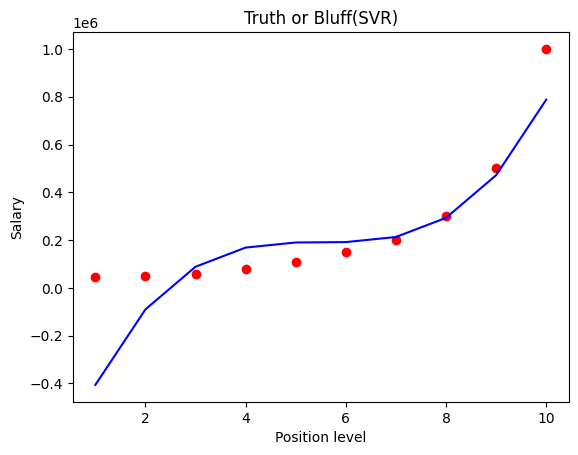

In [42]:
plt.scatter(s_x.inverse_transform(X), s_y.inverse_transform(Y), color='red')
plt.plot(s_x.inverse_transform(X),s_y.inverse_transform(reg.predict(X).reshape(-1,1)),color='blue')
plt.title('Truth or Bluff(SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()